## california data (linear regression data)

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1)

## Logistic regrssion 용 데이터

In [4]:
#  해당 코드는 수정하지 마세요
from sklearn.datasets import make_classification


X, y = make_classification(n_features=8, n_informative=5,
                           n_redundant=3, n_clusters_per_class=1, random_state=4, n_samples =1000 )

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

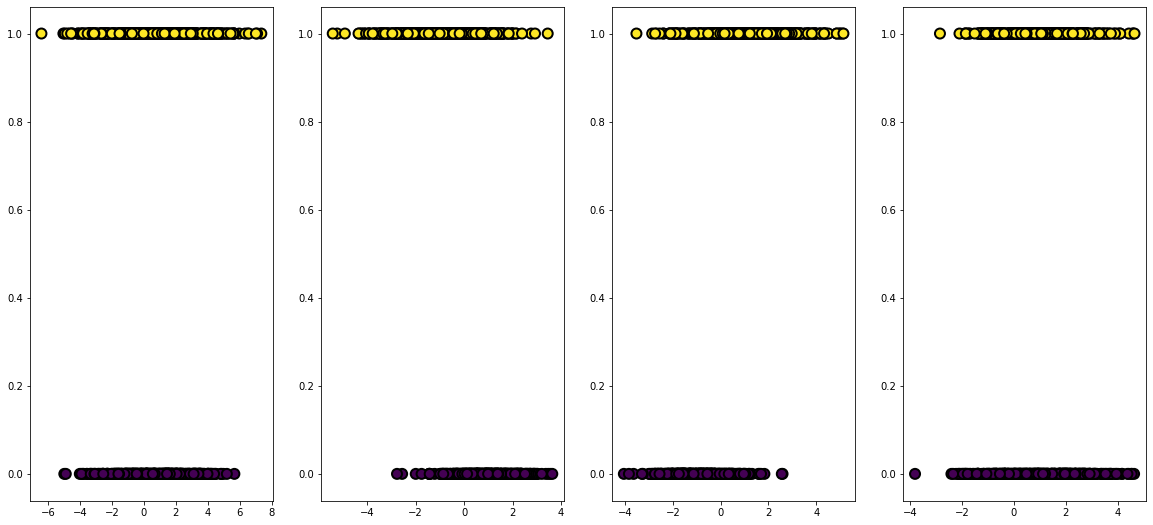

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
plt.scatter(x_train[:,0], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,2)
plt.scatter(x_train[:,1], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,3)
plt.scatter(x_train[:,2], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,4)
plt.scatter(x_train[:,3], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.show()

In [7]:

df = pd.DataFrame(x_train,columns=california.feature_names)
#pearson 상관계수 데이터 프레임
corr=df.corr(method='pearson')
print(corr)

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.491614  0.428175   0.864794    0.882213 -0.015299   
HouseAge   -0.491614  1.000000 -0.581195  -0.321899   -0.533847 -0.567328   
AveRooms    0.428175 -0.581195  1.000000   0.398194    0.576215  0.309815   
AveBedrms   0.864794 -0.321899  0.398194   1.000000    0.671022 -0.017291   
Population  0.882213 -0.533847  0.576215   0.671022    1.000000 -0.226332   
AveOccup   -0.015299 -0.567328  0.309815  -0.017291   -0.226332  1.000000   
Latitude   -0.389419 -0.349298  0.582072  -0.209205   -0.190266  0.429947   
Longitude   0.203572 -0.372997  0.948698   0.305802    0.355419  0.265621   

            Latitude  Longitude  
MedInc     -0.389419   0.203572  
HouseAge   -0.349298  -0.372997  
AveRooms    0.582072   0.948698  
AveBedrms  -0.209205   0.305802  
Population -0.190266   0.355419  
AveOccup    0.429947   0.265621  
Latitude    1.000000   0.718433  
Longitude   0.718433   1.000000  


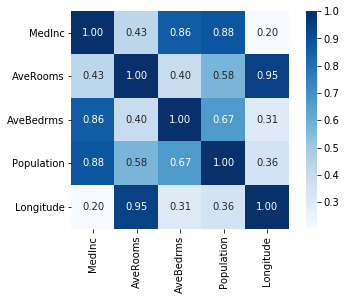

In [8]:
import seaborn as sns
# Averooms – longitude 0.948551
# Population – medinc 0.880861
# Avebedrms – medinc  0.864159	

#상관계수가 높은 featue들을 제외한 나머지 feature들을 행과 열에서 삭제
corr=corr.drop(["Latitude","AveOccup","HouseAge"])

del corr["Latitude"]
del corr["AveOccup"]
del corr["HouseAge"]

sns.heatmap(corr,cbar=True,annot=True,annot_kws={'size':10},fmt='.2f',square=True,cmap='Blues')
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#print(X)
#print(y)
features=['MedInc','AveRooms','AveBedrms','Population','Longitude']
#x을 feature로 나누기

#X=features X값으로 데이터 x_train, x_test로 데이터 프레임화하기
x_train_f=pd.DataFrame(x_train,columns=california.feature_names)
x_test_f=pd.DataFrame(x_test,columns=california.feature_names)
#해당 값 추출하기
hi_x_train=x_train_f[features].to_numpy()
hi_x_test=x_test_f[features].to_numpy()
#정규화할 모델 생성
scaler=StandardScaler()
#train값과 test값 정규화시키기
hi_x_train=scaler.fit_transform(hi_x_train)
hi_x_test=scaler.transform(hi_x_test)
#logistic regression모델 생성
model=LogisticRegression(multi_class='multinomial',solver='newton-cg')
model.fit(hi_x_train,y_train)

print(model.score(hi_x_test,y_test))



0.91


['MedInc']
['MedInc', 'HouseAge']
['MedInc', 'HouseAge', 'Latitude']
['MedInc', 'HouseAge', 'Latitude', 'Longitude']
[0.46998301854668634, 0.4940928194459876, 0.5050350833608732, 0.5798559375667254]
[0.47372228349279466, 0.5107955431800882, 0.5185667904306608, 0.5956009632041319]


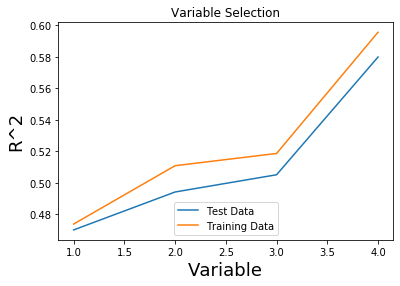

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1,random_state=4)

# R2 = 샘플의 R-square , p = predictors(변수)의 갯수 , n = 샘플 사이즈
def adjusted_r_square(R2,p,n):
        adjusted_r=1-(((1-R2)*(n-1))/(n-p-1))
        return adjusted_r

       

#linear model 생성
linear_model=LinearRegression()
final_score = []
final_score2=[]
# forward selection 을 이용하여 varible을 4개 까지 선택한다. (for 문 이용)
i_am_feature=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
total_data=pd.DataFrame(california.data,columns=california.feature_names)
hi_x_train=pd.DataFrame(x_train,columns=california.feature_names)
hi_x_test=pd.DataFrame(x_test,columns=california.feature_names)
#사용할 list들 생성
best_features=[]
check_feature=[]
best_features2=[]
check_feature2=[]

f_adj_list=[]
f_adj_list_tr=[]

# 처음에 i am feature 8개 다 돌아서 가장 좋은거 1개 구한다.
for i in i_am_feature:
        first_x_train=hi_x_train[[i]].to_numpy()
        first_x_test=hi_x_test[[i]].to_numpy()
        linear_model.fit(first_x_train,y_train)
        first_i_am_predict=linear_model.predict(first_x_test)
        
        first_ad_r=adjusted_r_square(r2_score(y_test,first_i_am_predict),1,20640)
        f_adj_list.append(first_ad_r)
#adjusted r square 값 최대값 찾기        
maxvalue=f_adj_list[0]
for k in f_adj_list:
        if maxvalue<k:
                maxvalue=k
# final1 list에 최대값 찾은거 추가시키기
final_score.append(maxvalue)
#최종적인 best_features와 계산하고 확인 해줄 check_feature 리스트에 adjusted r^2의 최대값에 해당하는 인덱스의 i_am_feature의 값을 추가시키기
best_features.append(i_am_feature[f_adj_list.index(maxvalue)])
check_feature.append(i_am_feature[f_adj_list.index(maxvalue)])

#위에서 추가시킨 feature을 이제 i_am_feature에서는 삭제해주기
i_am_feature.remove(i_am_feature[f_adj_list.index(maxvalue)])


#check_feature리스트에 하나씩 추가시켜서 adjusted r^2값 확인하고 최대값 찾으면 해당 feature을 check_feature에 다시 추가시키고 
#그 값을 i_am_feature에서 삭제시키는 방식을 계속 반복
#best_feature에 추가한 feature가 4개가 되면 for문을 나가도록 설정
for j in i_am_feature:
        adj_list=[]
        for p in i_am_feature:
                check_feature.append(p)
                f_x_train=hi_x_train[check_feature].to_numpy()
                f_x_test=hi_x_test[check_feature].to_numpy()
                linear_model.fit(f_x_train,y_train) #<---여기
                i_am_predict=linear_model.predict(f_x_test)
                ad_r=adjusted_r_square(r2_score(y_test,i_am_predict,),len(check_feature),20640)
                #print(len(check_feature))
                adj_list.append(ad_r)
                #print(adj_list)
        
                check_feature.remove(p)
        #print(check_feature)
        
        maxvalue=adj_list[0]
        #print(adj_list)
        for k in adj_list:
                if maxvalue<k:
                        maxvalue=k
        
        check_feature.append(i_am_feature[adj_list.index(maxvalue)])
        final_score.append(maxvalue)
        #print(final_score)
        best_features.append(i_am_feature[adj_list.index(maxvalue)])
        del i_am_feature[adj_list.index(maxvalue)]
        if(len(best_features)==4):
                break;

                
#test----------------------------
train_f2_adj_list=[]
test_f2_adj_list=[]

empty_list = []
# 처음에 i am feature 8개 다 돌아서 가장 좋은거 1개 구한다.
#위와 같은 방법으로 알아낸 best_features를 돌면서 train으로 train학습시키고 test로 test학습시켜 adjusted r^2값 구하기
for i in best_features:
    empty_list.append(i)
    print(empty_list)
    first2_x_train=hi_x_train[empty_list].to_numpy()
    
    linear_model.fit(first2_x_train,y_train)
    first2_i_am_predict=linear_model.predict(first2_x_train)
    first2_ad_r=adjusted_r_square(r2_score(y_train,first2_i_am_predict),1,20640)
    train_f2_adj_list.append(first2_ad_r) 
    
    
    
    
    first2_x_test=hi_x_test[empty_list].to_numpy()
    linear_model.fit(first2_x_test,y_test)
    first2_i_am_predict=linear_model.predict(first2_x_test)
    first2_ad_r=adjusted_r_square(r2_score(y_test,first2_i_am_predict),1,20640)
    test_f2_adj_list.append(first2_ad_r) 
        #first_i_am_predict_train=linear_model.predict(first_x_train) # <--
        #first_tr_ad_r=adjusted_r_square(r2_score(first_i_am_predict_train,y_test),1,20640)# <---
        
    
        
print(test_f2_adj_list)
print(train_f2_adj_list)


#train
                

variable=[1,2,3,4]

plt.plot(variable,test_f2_adj_list)
plt.plot(variable,train_f2_adj_list)


plt.title('Variable Selection')
plt.legend(['Test Data','Training Data'],loc='lower center')

plt.xlabel('Variable',fontsize=18)
plt.ylabel('R^2',fontsize=18)
plt.show()

In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
#평균값 내는 함수
def ave(list):
        sum=0
        for i in range(len(list)):
                sum+=list[i]
                
        return sum/len(list)

list=[0,1,2,3,4]

x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1)
#alpha값이 0.0001인 lasso모델 생성
lasso_1=Lasso(alpha=0.0001)
lasso_1.fit(x_train,y_train)
iam_predict1=lasso_1.predict(x_test)
validation_accuracy1=lasso_1.score(x_train,y_train)
score_kfold1=cross_val_score(lasso_1,x_train,y_train,cv=5)
score_kfold1_list=score_kfold1.tolist()
print(score_kfold1)
print(ave(score_kfold1_list))
    
#alpha값이 0.01인 lasso모델 생성
lasso_2=Lasso(alpha=0.01)
lasso_2.fit(x_train,y_train)
iam_predic2=lasso_2.predict(x_test)
validation_accuracy2=lasso_2.score(x_train,y_train)
score_kfold2=cross_val_score(lasso_2,x_train,y_train,cv=5)
score_kfold2_list=score_kfold2.tolist()
print(ave(score_kfold2_list))
print(score_kfold2)
#alpha값이 0.1 인 lasso모델 생성
lasso_3=Lasso(alpha=0.1)
lasso_3.fit(x_train,y_train)
iam_predic3=lasso_3.predict(x_test)
validation_accuracy3=lasso_3.score(x_train,y_train)
score_kfold3=cross_val_score(lasso_3,x_train,y_train,cv=5)
score_kfold3_list=score_kfold3.tolist()
print(ave(score_kfold3_list))
print(score_kfold3)

print("\ntest R^2 :",r2_score(y_test,iam_predict1))


[0.6322773  0.63306472 0.58881117 0.59834328 0.58439068]
0.607377430213575
0.6042576864612763
[0.62824736 0.62828457 0.59435611 0.58873856 0.58166183]
0.5486440969806209
[0.57312467 0.57447586 0.53699725 0.53037577 0.52824693]

test R^2 : 0.5806187184715894
